## Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
from nltk.corpus import stopwords
import seaborn as sns

In [ ]:
nltk.download('stopwords')
PUNCT_TO_REMOVE = string.punctuation
STOPWORDS = set(stopwords.words('english'))
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))


def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])


def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])


def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)


def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)


def pre_process(x):
  return remove_punctuation, remove_stopwords, lemmatize_words(x), remove_emoji(x), remove_urls(x)


### Facebook data

In [ ]:
fbdf = pd.read_csv('/content/gdrive/MyDrive/Master_Thesis/Modeling/data/facebook.csv')
fbdata = fbdf[['text', 'anti_vax']]
fbdata['comments'] = fbdata['text']
fbdata['sentiment'] = fbdata['anti_vax'].apply(lambda x: 1 if x is True else 0)
fbdata = fbdata[['comments', 'sentiment']]
fbdata['platform'] = 'Facebook'
fbdata = fbdata.dropna()
print(len(fbdata.comments))
fbdata.sample(10)

74034


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,comments,sentiment,platform
1351,"followers, we will have two food trucks on Tu...",0,Facebook
57739,Congratulations to star and her husband!,0,Facebook
76233,T r u t h.,1,Facebook
56696,YES.,0,Facebook
21324,RT @911well: If you don't you'll never know .....,0,Facebook
77676,I want all my friend and family members who th...,1,Facebook
45231,The Health Ranger tells it like it is – Jill H...,1,Facebook
62128,"The actress calls it another huge ""transition ...",0,Facebook
31189,What's the ONE thing we've all been waiting fo...,1,Facebook
14127,CFHI Managing Director Robin Young highlights ...,0,Facebook


In [ ]:
# fbdata['comments'] = fbdata['text'].astype(str).apply(lambda x: x.encode('latin-1', 'ignore').decode('latin-1'))

fbdata['comments'] = fbdata['comments'].str.lower()
fbdata['comments'] = fbdata['comments'].apply(lambda x: remove_punctuation(x) )
fbdata['comments'] = fbdata['comments'].apply(lambda x: remove_stopwords(x) )
fbdata['comments'] = fbdata['comments'].apply(lambda x: remove_emoji(x) )
fbdata['comments'] = fbdata['comments'].apply(lambda x: lemmatize_words(x) )
fbdata['comments'] = fbdata['comments'].apply(lambda x: remove_urls(x) )


print(len(fbdata.comments))
fbdata.sample(10)

74034


,comments,sentiment,platform
32757,much time child spend bedroom way reduce aller...,0,Facebook
37159,make sure everyone care baby including sibling...,0,Facebook
87962,go go go,0,Facebook
24024,may lot backlash really mind lately often peop...,1,Facebook
30916,didnt distribute drug called factor viii 1980s...,1,Facebook
27709,happy mother day u empowering parent,0,Facebook
33241,powerful 1st episode gmos revealed vitally imp...,0,Facebook
21829,mark may 18 2016 calendar day student teacher ...,0,Facebook
29469,put together pro con natural childbirth mentio...,0,Facebook
73148,perhaps post visibly hospital clinic,1,Facebook


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2a6103e90>]],
      dtype=object)

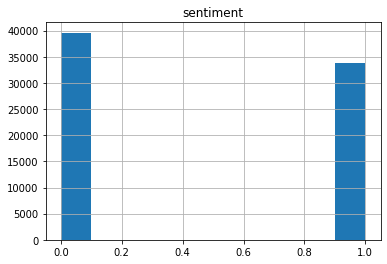

In [ ]:
fbdata.to_csv('fb.csv', index=False)
fdata = pd.read_csv('fb.csv')
fdata = fdata.dropna()
fdata.hist('sentiment')

### Reddit data

In [ ]:
rdf = pd.read_csv('/content/gdrive/MyDrive/Master_Thesis/Modeling/data/reddit.csv')
filter_char = lambda c: ord(c) < 256
rdata = rdf[['sentiment', 'body']]
rdata = rdata.query('sentiment <= -0.93 | sentiment >= 0.90')
rdata['sentiment'] = rdata['sentiment'].apply(lambda x: 1 if x < 0 else 0)
rdata['comments'] = rdata['body']
rdata = rdata[['comments', 'sentiment']]
rdata['platform'] = 'Reddit'
rdata = rdata.dropna()
rdata.sample(10)

,comments,sentiment,platform
1326099,"For those who don’t remember, [in 2018 he said...",1,Reddit
1990791,Sometime back I saw a Tweet talking about how ...,0,Reddit
1534523,You think that it was about stopping genocide?...,1,Reddit
486450,"Yeah, I hear you. I’m trying not to stress ove...",0,Reddit
1470655,Should I feel sorry for him or laugh? He actua...,0,Reddit
1304200,This is so upsetting. This means that the coo...,1,Reddit
1711444,"The two statements are entirely different, and...",1,Reddit
523948,"The problem, I think, is that the misinformati...",1,Reddit
2393997,"Ah, yes. My freedom to walk out the door and n...",0,Reddit
1241694,What the fuck is your problem? Are you threate...,1,Reddit


In [ ]:
rdata['comments'] = rdata['comments'].str.lower()
rdata['comments'] = rdata['comments'].apply(lambda x: remove_punctuation(x) )
rdata['comments'] = rdata['comments'].apply(lambda x: remove_stopwords(x) )
rdata['comments'] = rdata['comments'].apply(lambda x: remove_emoji(x) )
rdata['comments'] = rdata['comments'].apply(lambda x: lemmatize_words(x) )
rdata['comments'] = rdata['comments'].apply(lambda x: remove_urls(x) )


print(len(rdata.comments))
rdata.sample(10)

106428


,comments,sentiment,platform
1552513,haha awesome man check carnivore next rabbit h...,0,Reddit
2006124,made huge profit 2020 20 gain last close plus ...,0,Reddit
642447,pretty easy look largest group died covid como...,1,Reddit
613928,doomsday cult tribalist nonsense one want medi...,1,Reddit
1159132,want badly feel something people truth theyre ...,1,Reddit
2415602,first one opinion pretty redpilled subtle enou...,0,Reddit
2260902,nice love people death wish super fun,0,Reddit
1633718,refuse accept data absurd data clear freely ac...,1,Reddit
1539510,joke giving homework yes idea described public...,0,Reddit
306691,go monthly adjustment therapy stay aligned wou...,0,Reddit


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2a07788d0>]],
      dtype=object)

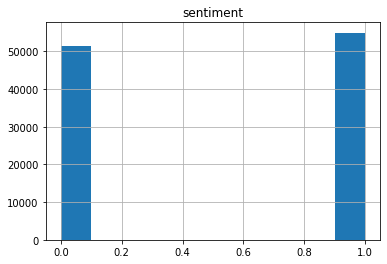

In [ ]:
rdata.to_csv('r.csv', index=False)
rdata = pd.read_csv('r.csv')
rdata = rdata.dropna()
rdata.hist('sentiment')

### Twitter Data

In [ ]:
t2df = pd.read_csv('/content/gdrive/MyDrive/Master_Thesis/Modeling/data/tweet2.csv', encoding= 'unicode_escape')
filter_char = lambda c: ord(c) < 256
t2data = t2df[['label', 'tweet_text']]
t2data['comments'] = t2df['tweet_text']
t2data['sentiment'] = t2df['label'].apply(lambda x: 1 if x == 1 else 0)
t2data = t2data[['comments', 'sentiment']]
t2data['platform'] = 'Twitter'
t2data = t2data.dropna()
t2data.sample(10)

,comments,sentiment,platform
2342,"College was Fun until,\nwe said ""We'll Be In T...",0,Twitter
1006,Russia will supply an unspecified number of #S...,0,Twitter
52,FWIW: Ill go with the 2- shots of either #Pfi...,0,Twitter
852,"#Moderna. Four days AFTER getting vaccine, I j...",0,Twitter
212,#vaccinatevirginia 1st dose of #moderna done. ...,0,Twitter
3512,Where to get the COVID-19 vaccine in NELA the ...,0,Twitter
2471,Got my first shot ? #Moderna #COVID19 #keepsafe,0,Twitter
1683,US Secures 200 Million More Doses of Moderna a...,0,Twitter
5102,If you got your vaccination and thought that y...,0,Twitter
1081,?@GovCanHealth? ?@CPHO_Canada? ?@JustinTrudeau...,0,Twitter


In [ ]:
t2data['comments'] = t2data['comments'].str.lower()
t2data['comments'] = t2data['comments'].apply(lambda x: remove_punctuation(x))
t2data['comments'] = t2data['comments'].apply(lambda x: remove_stopwords(x))
t2data['comments'] = t2data['comments'].apply(lambda x: remove_emoji(x))
t2data['comments'] = t2data['comments'].apply(lambda x: lemmatize_words(x))
t2data['comments'] = t2data['comments'].apply(lambda x: remove_urls(x))

print(len(rdata.comments))
rdata.sample(10)

106427


,comments,sentiment,platform
61652,gtthey release restriction case go yes look en...,0,Reddit
1876,really wellversed religious implication global...,0,Reddit
42231,oh interesting know don’t wear mask maybe don’...,0,Reddit
43212,bunch gibberish way mind look inside might wan...,1,Reddit
14615,look im side stuff please dont mistake one ann...,0,Reddit
88834,feel society seriously rethink whats worth tur...,1,Reddit
60169,problem immigrant come act proper citizen abso...,1,Reddit
101081,restaurant live didn’t even bother putting ple...,0,Reddit
72504,don’t don’t believe understand i’m sure person...,1,Reddit
2129,agree yet see post conspiracy theory negative ...,1,Reddit


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc267bd3fd0>]],
      dtype=object)

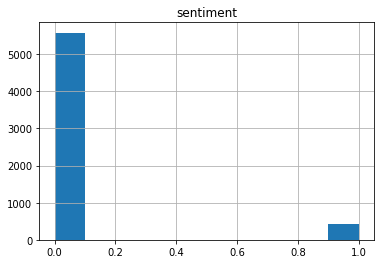

In [ ]:
t2data.to_csv('t2.csv', index=False)
t2data = pd.read_csv('t2.csv')
t2data = t2data.dropna()
t2data.hist('sentiment')

In [ ]:
t3df = pd.read_csv('/content/gdrive/MyDrive/Master_Thesis/Modeling/data/tweet3.csv', encoding= 'unicode_escape')
filter_char = lambda c: ord(c) < 256
t3data = t3df[['tweet', 'Emotion']]
t3data['comments'] = t3data['tweet']
t3data['sentiment'] = t3data['Emotion'].apply(lambda x: 1 if x == "Negative" else 0)
t3data = t3data[['comments', 'sentiment']]
t3data['platform'] = 'Twitter'
t3data = t3data.dropna()
t3data.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,comments,sentiment,platform
63978,"Governor of Florida, Ron DeSantis is prohibiti...",1,Twitter
59269,"""Why scientists are developing inhaled Covid-1...",0,Twitter
196,@Flynnstone12 @Danielle1O19 There are many rea...,0,Twitter
89297,Ryan Reynolds And Blake Lively Got The COVID-1...,0,Twitter
12266,"This #WorldHealthDay, we thank health professi...",0,Twitter
76126,Just got your COVID-19 vaccine and want to sha...,0,Twitter
78929,It seems entirely appropriate that a serving a...,0,Twitter
14851,Scientists Discover Cause Of Blood Clots From ...,0,Twitter
51873,@celliottability The CDC and Prevention say it...,0,Twitter
21759,"NASHVILLE, Tenn. (AP) - Tennessee Gov. Bill Le...",0,Twitter


In [ ]:
t3data['comments'] = t3data['comments'].str.lower()
t3data['comments'] = t3data['comments'].apply(lambda x: remove_punctuation(x))
t3data['comments'] = t3data['comments'].apply(lambda x: remove_stopwords(x))
t3data['comments'] = t3data['comments'].apply(lambda x: remove_emoji(x))
t3data['comments'] = t3data['comments'].apply(lambda x: lemmatize_words(x))
t3data['comments'] = t3data['comments'].apply(lambda x: remove_urls(x))

print(len(t3data.comments))
t3data.sample(10)

91709


,comments,sentiment,platform
6746,india go past u becomes fastest nation adminis...,0,Twitter
79492,covid19 vaccine httpstco1zvarv8hrh,0,Twitter
35703,vaccine start becoming accessible urge oregoni...,0,Twitter
20586,sioux fall sd ap u rep dusty johnson received ...,0,Twitter
75852,seychelles open border visitor covid19 vaccine...,0,Twitter
8146,asked veteran question ¡°why choose vaccinated...,0,Twitter
42990,zoeharcombe thats pathetic analogy ive prove i...,0,Twitter
17089,covid19 survey show senior happier vaccine rol...,0,Twitter
83521,update covid19 01apr21 800am gmt 5 vaccination...,0,Twitter
60626,go covid19 vaccine mbstadium register httpstco...,0,Twitter


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc26865c610>]],
      dtype=object)

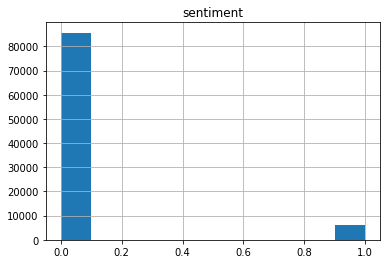

In [ ]:
t3data.to_csv('t3.csv', index=False)
t3data = pd.read_csv('t3.csv')
t3data = t3data.dropna()
t3data.hist('sentiment')

### Final Dataset

In [ ]:
dataset = pd.concat([fdata, rdata, t2data, t3data], ignore_index=True)

In [ ]:
print(len(dataset))
print(len(rdata) + len(fdata) + len(t2data) + len(t3data))

277601
277601


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc262bb6890>]],
      dtype=object)

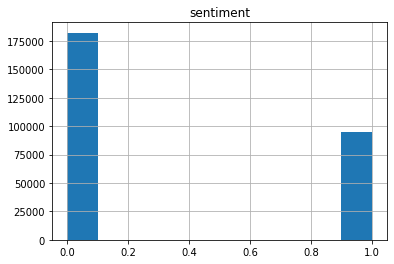

In [ ]:
dataset.hist('sentiment')

In [ ]:
dataset.sample(20)

,comments,sentiment,platform
19733,guess vaccine 🤔 learntherisk vaxxed saidnomoth...,1,Facebook
16454,interesting read,0,Facebook
128518,throw used paper tissue one expensive garbage ...,0,Reddit
20614,stop vaccinating,1,Facebook
222175,nevadan 16 older now eligible covid19 vaccine ...,0,Twitter
67365,denial refusing face fact autism epidemic hurt...,1,Facebook
262094,moderna pfizerbiontech vaccine offer immunity ...,0,Twitter
169781,yall gonna realize culture celebrates reward h...,0,Reddit
7431,ohhhyes pleeeease pregnancy birth parenting th...,0,Facebook
189106,ontario government expanding covid19 vaccine e...,0,Twitter


In [ ]:
dataset.to_csv('/content/gdrive/MyDrive/Master_Thesis/Modeling/data/final_data.csv', index=False)

## Analysis

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Master_Thesis/Modeling/data/final_data.csv')
data.sample(10)

,comments,sentiment,platform
15606,omygosh horrifying ch,1,Facebook
137997,antifa muslim reach iran trying destroy u insi...,1,Reddit
200428,today total number confirmed covid19 case 1 55...,0,Twitter
105465,gtthis post way stating opinion taking side gt...,1,Reddit
23943,learn today parenting parenthood quote,0,Facebook
276315,pakistani president test positive covid19 inje...,0,Twitter
51121,120day maternity leave still pending congress ...,0,Facebook
112239,super rich still want,0,Reddit
67350,parent put abusive doctor okcteen,1,Facebook
40862,initial coverage merck’s petition expand indic...,1,Facebook


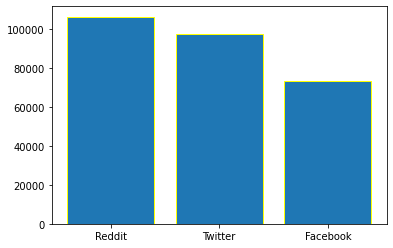

In [ ]:
def plot_count():
    
  x = ['Reddit', 'Twitter', 'Facebook']
  
  # getting count for each author text appear in train dataset
  y = data.platform.value_counts().values
  
  plt.bar(x,y, edgecolor='yellow')
  plt.show()
  
  
plot_count()

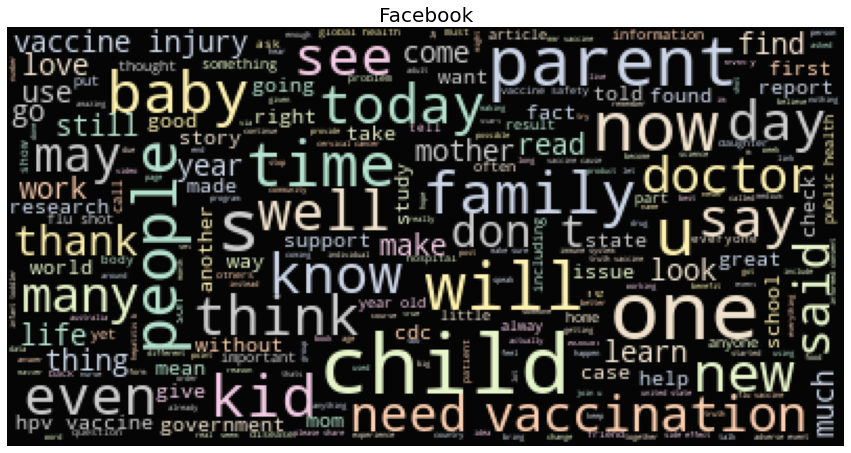

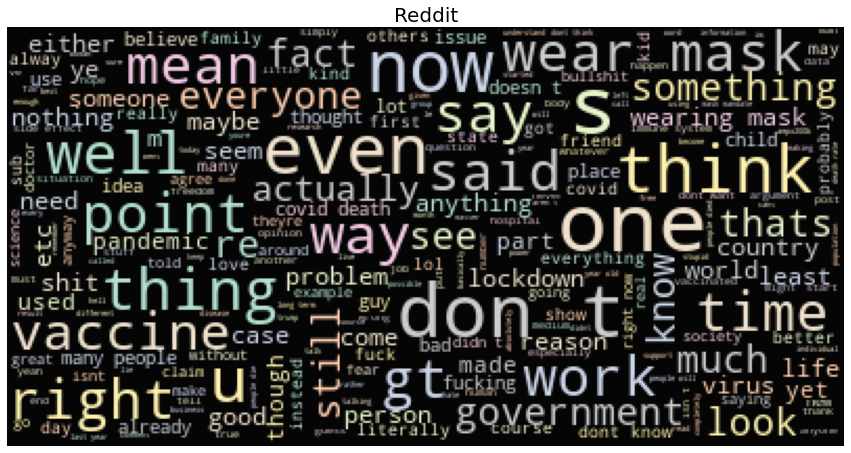

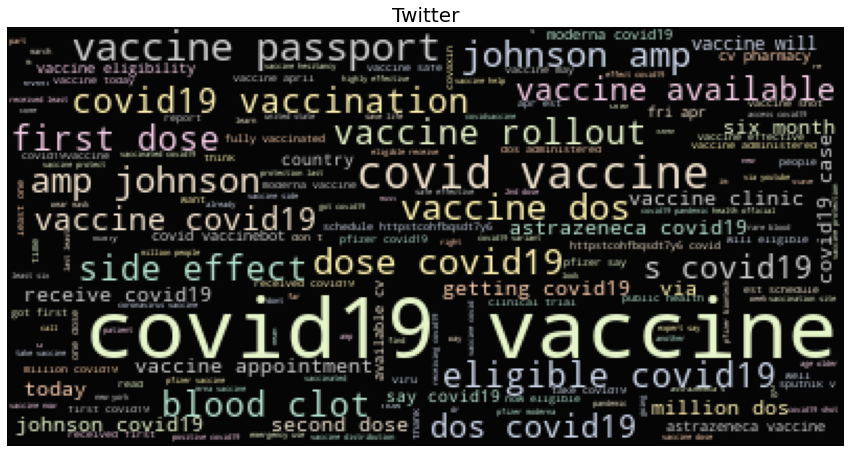

In [ ]:
def word_cloud_viz():

  fb = data[data.platform=="Facebook"]["comments"].values
  r = data[data.platform=="Reddit"]["comments"].values
  t = data[data.platform=="Twitter"]["comments"].values

  plt.figure(figsize=(15, 10))
  wc = WordCloud(background_color="black", max_words=10000, stopwords=STOPWORDS, max_font_size=40)
  wc.generate(" ".join(fb))
  plt.title("Facebook", fontsize=20)
  plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
  plt.axis('off')

  
  plt.figure(figsize=(15, 10))
  wc = WordCloud(background_color="black", max_words=10000, stopwords=STOPWORDS, max_font_size=40)
  wc.generate(" ".join(r))
  plt.title("Reddit", fontsize=20)
  plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
  plt.axis('off')
  
  
  plt.figure(figsize=(15, 10))
  wc = WordCloud(background_color="black", max_words=10000, stopwords=STOPWORDS, max_font_size=40)
  wc.generate(" ".join(t))
  plt.title("Twitter", fontsize=20)
  plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
  plt.axis('off')
  
  
word_cloud_viz()

In [ ]:
def makeWordCloud(bkColor, w, h, series, title, ax):
    wcl = WordCloud(background_color=bkColor,
                    width=w,
                    height=h).generate(" ".join(series))
    ax.imshow(wcl)
    ax.axis('off')
    ax.set_title(title, fontsize=40)

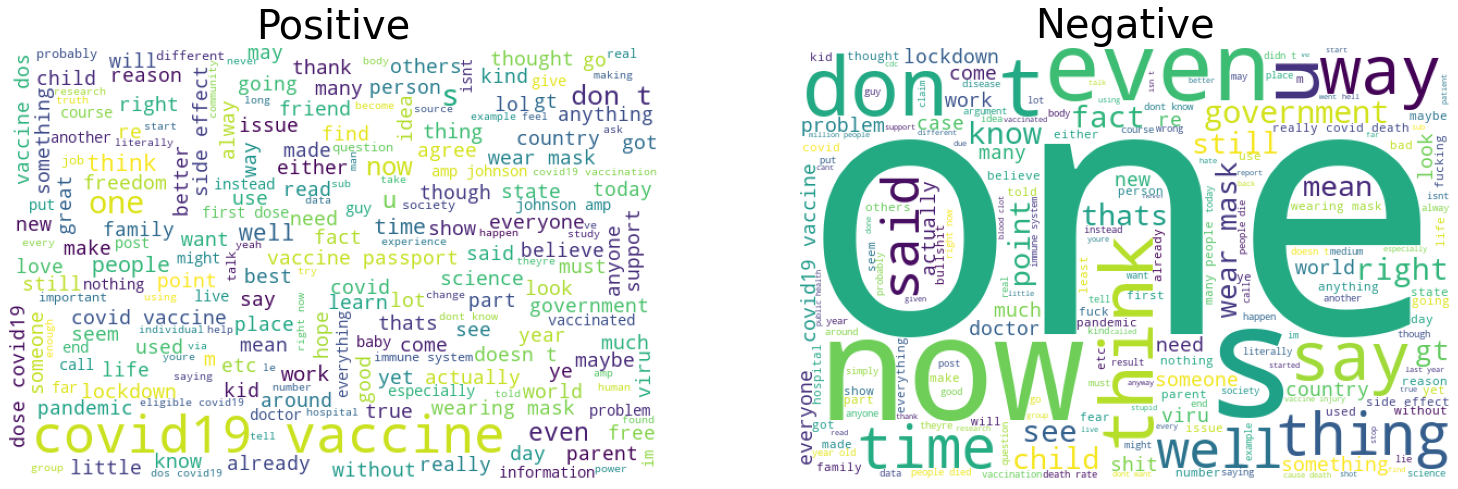

In [ ]:
positive = data[data['sentiment']==0]['comments']
negative = data[data['sentiment']==1]['comments']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])
makeWordCloud("white", 600, 400, positive, "Positive", ax1)
makeWordCloud("white", 600, 400, negative, "Negative", ax2)
plt.show()

In [ ]:
fdn = data.loc[(data['platform'] == "Facebook") & (data['sentiment'] == 1)]
rdn = data.loc[(data['platform'] == "Reddit") & (data['sentiment'] == 1)]
tdn = data.loc[(data['platform'] == "Twitter") & (data['sentiment'] == 1)]

In [ ]:
def plot_words_count(data):
  """
  This function will return a bar plot for first 30 words counts appears in dataset
  """
  # getting all words and their count of occurances
  words = data.comments.str.split(expand=True).unstack().value_counts()

  # selecting 30 words
  x = words.index.values[2:32]
  print(x)
  y = words.values[2:32]
  
  # plotting barplot
  fig = plt.figure()
  fig.set_figwidth(10)
  plt.bar(x,y, edgecolor = 'yellow')
  plt.title(data.platform.values.any() + ' Most Used Negative words')

['will' 'vaccination' 'one' 'health' 'u' 'know' 'medical' 'year' 'parent'
 'people' 'doctor' 'time' 'dr' 'now' 'disease' 'right' 'please' 'study'
 'many' 'autism' 'day' 'death' 'make' 'baby' 'vaccinated' 'case' 'cause'
 'measles' 'state' 'flu']


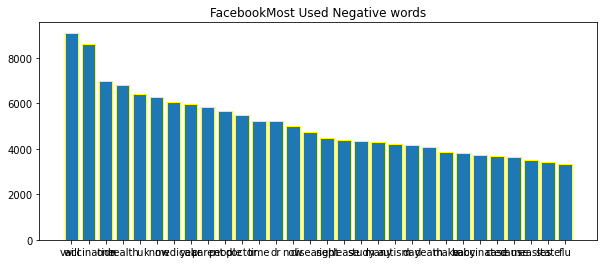

In [ ]:
plot_words_count(fdn)

['death' 'mask' 'vaccine' 'one' 'will' 'dont' 'even' 'know' 'virus' 'year'
 'think' 'u' 'now' 'thing' 'time' 'life' 'make' 'im' 'want' 'go' 'say'
 'right' 'going' 'flu' 'many' 'die' 'way' 'see' 'government' 'still']


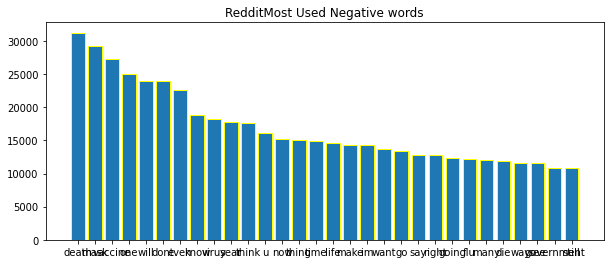

In [ ]:
plot_words_count(rdn)

['blood' 'clot' 'astrazeneca' 'rare' 'say' 'people' 'take' 'will'
 'johnson' 'covid' 'amp' 'risk' 'u' 'uk' 'death' 'link' 'case' 'need'
 'may' 'government' 'effect' 'said' 'regulator' '19' 'agency' 'european'
 'possible' 'side' 'still' 'via']


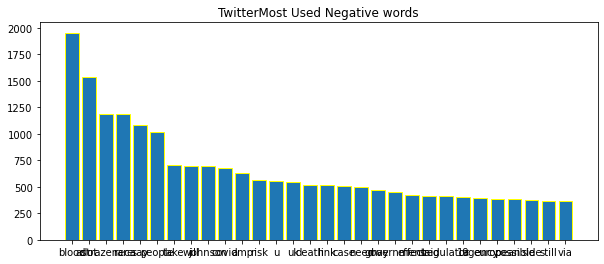

In [ ]:
plot_words_count(tdn)

In [ ]:
fd = data.loc[(data['platform'] == "Facebook")]
rd = data.loc[(data['platform'] == "Reddit")]
td = data.loc[(data['platform'] == "Twitter")]

In [ ]:
def sentiment_count(data):
  """
  Count of positive and negative sentiment
  """
  # plotting barplot
  fig = plt.figure()
  fig.set_figwidth(10)
  data.hist('sentiment')
  plt.title(data.platform.values.any() + ' Sentiment Count')

<Figure size 720x288 with 0 Axes>

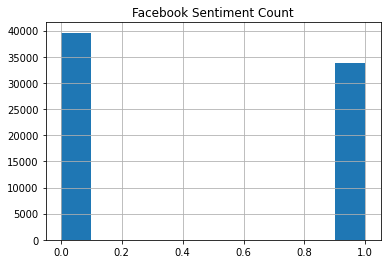

<Figure size 720x288 with 0 Axes>

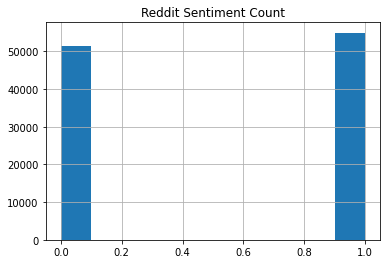

<Figure size 720x288 with 0 Axes>

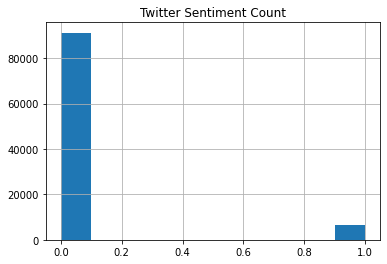

In [ ]:
sentiment_count(fd)
sentiment_count(rd)
sentiment_count(td)

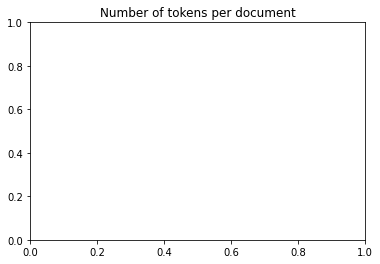

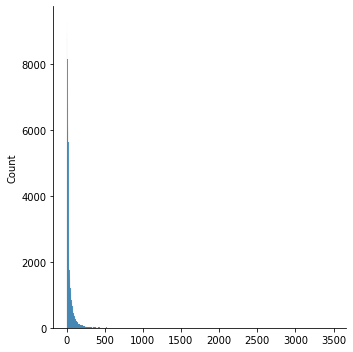

In [ ]:
plt.title('Number of tokens per document')
sns.displot(data["comments"].apply(lambda x : len(x.split(' '))).tolist())